## Purpose of script

**Input data:**
- Final Machine Learning Data - all cancer types with shortlisted protein list

**Output:**
- Data visualistion results via unsupervised machine learning methods - PCA, T-SNE, UMAP
- Checking wether the addition of the other cancer types to the ones used in the reference paper (it was used to shortlist the protein list: https://doi.org/10.1038/ncomms4887) significantly changed the cluster locations in relation to each other

## Importing dataset

In [17]:
# Importing necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn import decomposition
import seaborn as sn 
from sklearn.manifold import TSNE
import umap 
import plotly.express as px 

In [18]:
# Reading in full TCGA data which contains all the proteins
ML_TCGA_Data = pd.read_csv("../R/Data/Processed_Data/Final_Machine_Learning_Data.csv")
ML_TCGA_Data.drop(['Unnamed: 0'], axis=1, inplace=True)

ML_TCGA_Data = ML_TCGA_Data.sort_values(by='projectid')

# Converting numerical cancer types into appropriate names for the data visualisation
ML_TCGA_Data['projectid'].replace(to_replace=0, value="Glioblastoma", inplace=True) # GBM (Glioblastoma multiforme)
ML_TCGA_Data['projectid'].replace(to_replace=1, value="Brain Lower Grade Glioma", inplace=True) # LGG (Brain Lower Grade Glioma)
ML_TCGA_Data['projectid'].replace(to_replace=2, value="Head and Neck squamous cell", inplace=True) # HNSC (Head and Neck squamous cell carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=3, value="Thyroid", inplace=True) # THCA (Thyroid carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=4, value="Esophageal", inplace=True) # ESCA (Esophageal carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=5, value="Sarcoma", inplace=True) # SARC (Sarcoma)
ML_TCGA_Data['projectid'].replace(to_replace=6, value="Melanoma", inplace=True) # SKCM (Skin Cutaneous Melanoma)
ML_TCGA_Data['projectid'].replace(to_replace=7, value="Lung adenocarcinoma", inplace=True) # LUAD (Lung adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=8, value="Lung squamous cell", inplace=True) # LUSC (Lung squamous cell carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=9, value="Mesothelioma", inplace=True) # MESO (Mesothelioma)
ML_TCGA_Data['projectid'].replace(to_replace=10, value="Thymoma", inplace=True) # THYM (Thymoma)
ML_TCGA_Data['projectid'].replace(to_replace=11, value="Breast", inplace=True) # BRCA (Breast invasive carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=12, value="Stomach adenocarcinoma", inplace=True) # STAD (Stomach adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=13, value="Liver hepatocellular", inplace=True) # LIHC (Liver hepatocellular carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=14, value="Pancreatic adenocarcinoma", inplace=True) # PAAD (Pancreatic adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=15, value="Adrenocortical", inplace=True) # ACC (Adrenocortical carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=16, value="Pheochromocytoma and Paraganglioma", inplace=True) # PCPG (Pheochromocytoma (adrenal) and Paraganglioma (nerves in neck and head))
ML_TCGA_Data['projectid'].replace(to_replace=17, value="Kidney renal clear cell", inplace=True) # KIRC (Kidney renal clear cell carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=18, value="Kidney Chromophobe", inplace=True) # KICH (Kidney Chromophobe)
ML_TCGA_Data['projectid'].replace(to_replace=19, value="Kidney renal papillary cell", inplace=True) # KIRP (Kidney renal papillary cell carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=20, value="Colon adenocarcinoma", inplace=True) # COAD (Colon adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=21, value="Rectum adenocarcinoma", inplace=True) # READ (Rectum adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=22, value="Ovarian serous cystadenocarcinoma", inplace=True) # OVCA(OV, Ovarian serous cystadenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=23, value="Uterine Endometrial", inplace=True) # UCEC (Uterine Corpus Endometrial Carcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=24, value="Cervical squamous cell and endocervical adenocarcinoma", inplace=True) # CESC (Cervical squamous cell carcinoma and endocervical adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=25, value="Prostate adenocarcinoma", inplace=True) # PRAD (Prostate adenocarcinoma)
ML_TCGA_Data['projectid'].replace(to_replace=26, value="Testicular Germ Cell", inplace=True) # TGCT (Testicular Germ Cell Tumors)
ML_TCGA_Data['projectid'].replace(to_replace=27, value="Bladder Urothelial", inplace=True) # BLCA (Bladder Urothelial Carcinoma)



ML_TCGA_Data.head()

,projectid,4ebp1ps65,4ebp1,accps79,aktps473,aktpt308,akt,ar,bax,bcl2,...,taz,transglutaminase,tfrc,tuberinpt1462,ets1,rab25,4ebp1pt37t46,ampkalphapt172,jnkpt183y185,p70s6k1
0,Glioblastoma,0.435470,-0.26220,0.70530,3.20810,2.701900,0.57826,0.156790,0.261060,-0.313500,...,-0.16383,-0.683520,0.032527,1.185400,-1.35240,-1.21030,2.575500,0.326780,0.82262,0.185390
109,Glioblastoma,0.215944,0.45569,-1.54995,1.21515,1.391755,-1.13105,-0.446715,0.770130,-0.211549,...,0.64812,-0.010560,-1.133710,0.264626,0.99054,-1.18625,2.366050,-1.531800,0.22660,-0.116937
110,Glioblastoma,0.883400,-0.45678,0.32753,1.51230,0.856880,0.64854,-0.272890,-0.191920,0.001495,...,0.11434,-0.546020,-0.321430,0.467900,1.16540,-1.10690,-0.083756,0.427670,1.13660,-0.124640
111,Glioblastoma,0.009421,-0.43333,-0.44510,0.56134,0.097897,-0.21309,-0.430710,0.203480,-0.551750,...,0.23339,-0.028227,-0.065713,0.076012,-0.69933,-0.85102,-0.123640,0.160580,0.67958,-0.425930
112,Glioblastoma,-0.078615,0.22790,0.68237,1.88380,1.016700,-0.18228,0.044833,-0.017743,-0.054759,...,-0.38600,-0.743640,-0.325540,0.546210,-1.81940,-0.40297,-0.071149,0.059136,0.48017,-0.031502


In [19]:
# Seperating the labels (cancer types) and the data (proteins)
labels = ML_TCGA_Data["projectid"]
data = ML_TCGA_Data.drop(["projectid"], axis=1)
labels.shape
data.shape

(5438, 113)

## Standardisation of data

I will also create a standardised version of the data to check if data visualisation of clusters is improved when using the standardised data versus the non-standardised data. Standardisation will be performed using the `StandardScaler()` from sklearn. Z-score Standardization (StandardScaler) assumes the data is approximately normally distributed therefore I will check the histograms of randomly picked proteins (I repeated this to get a sense of the distribution of most proteins).

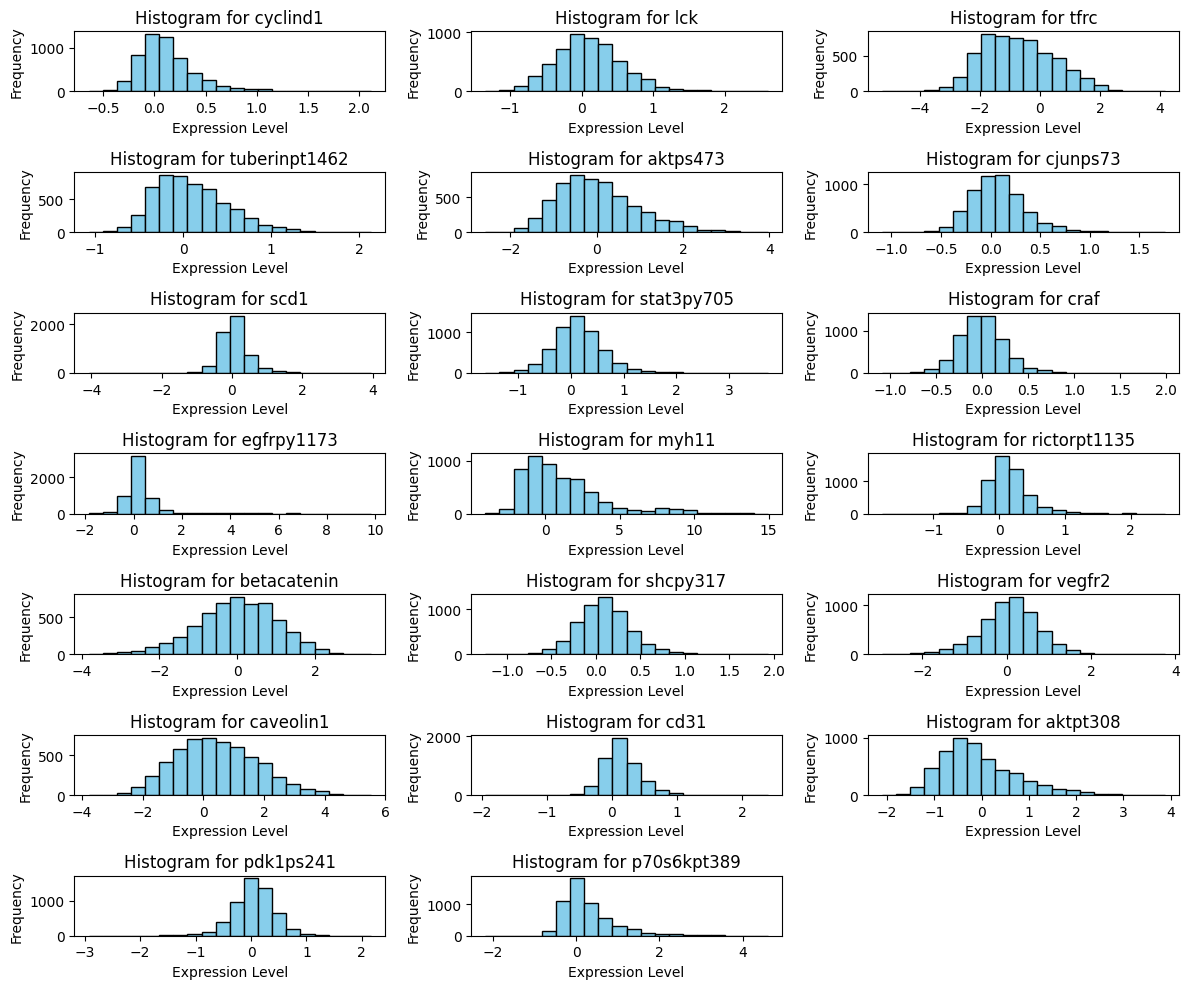

In [33]:
# Select 20 random proteins from the data columns
random_proteins = random.sample(list(data.columns), 20)

# Calculate the number of proteins and define subplot layout
num_proteins = len(random_proteins)
num_cols = 3  # Number of columns for subplots
num_rows = (num_proteins + 1) // num_cols  # Number of rows for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot histograms for each protein
for i, protein in enumerate(random_proteins):
    ax = axes[i]  # Get the current axis
    ax.hist(data[protein], bins=20, edgecolor='black', color='skyblue')
    ax.set_title(f'Histogram for {protein}')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(num_proteins, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Data-preprocessing: Standardising the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

## Principal Component Analysis (PCA)

In [22]:
# Configuring the parameters
# The number of components = 2
pca = decomposition.PCA(n_components=2)


pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape =", pca_data.shape)

shape of pca_reduced.shape = (5438, 2)


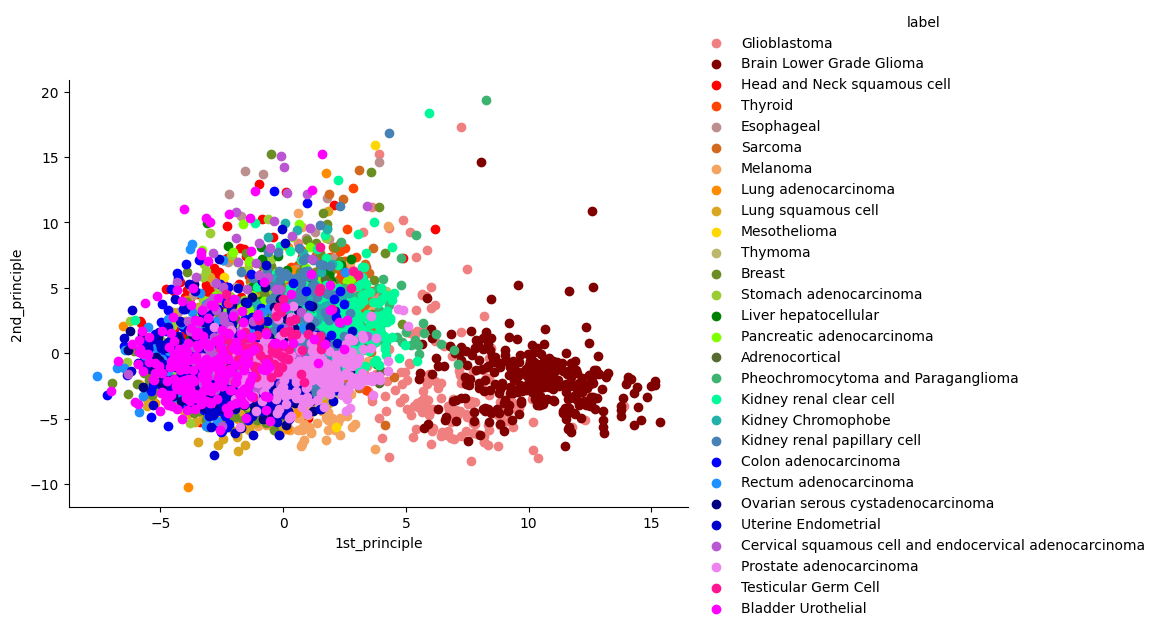

In [23]:
# PCA on standarised data

# Attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

# Creating a new data frame which helps us in plotting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principle", "2nd_principle", "label"))
sn.FacetGrid(pca_df, hue_kws={'color': ['lightcoral', 
                                         'maroon', 
                                         'red', 
                                         'orangered', 
                                         'rosybrown', 
                                         'chocolate', 
                                         'sandybrown', 
                                         'darkorange', 
                                         'goldenrod', 
                                         'gold', 
                                         'darkkhaki', 
                                         'olivedrab', 
                                         'yellowgreen', 
                                         'green', 
                                         'chartreuse', 
                                         'darkolivegreen',
                                         'mediumseagreen',
                                         'mediumspringgreen',
                                         'lightseagreen',
                                         'steelblue', 
                                         'blue',
                                         'dodgerblue',
                                         'navy',
                                         'mediumblue',
                                         'mediumorchid',
                                         'violet',
                                         'deeppink',
                                         'magenta']}, hue="label", aspect= 1.5, height=5).map(plt.scatter, "1st_principle", "2nd_principle").add_legend()
plt.show()

**Conclusion:** PCA is not able to seperate the cancer types

## t-distributed Stochastic Neighbor Embedding (T-SNE)

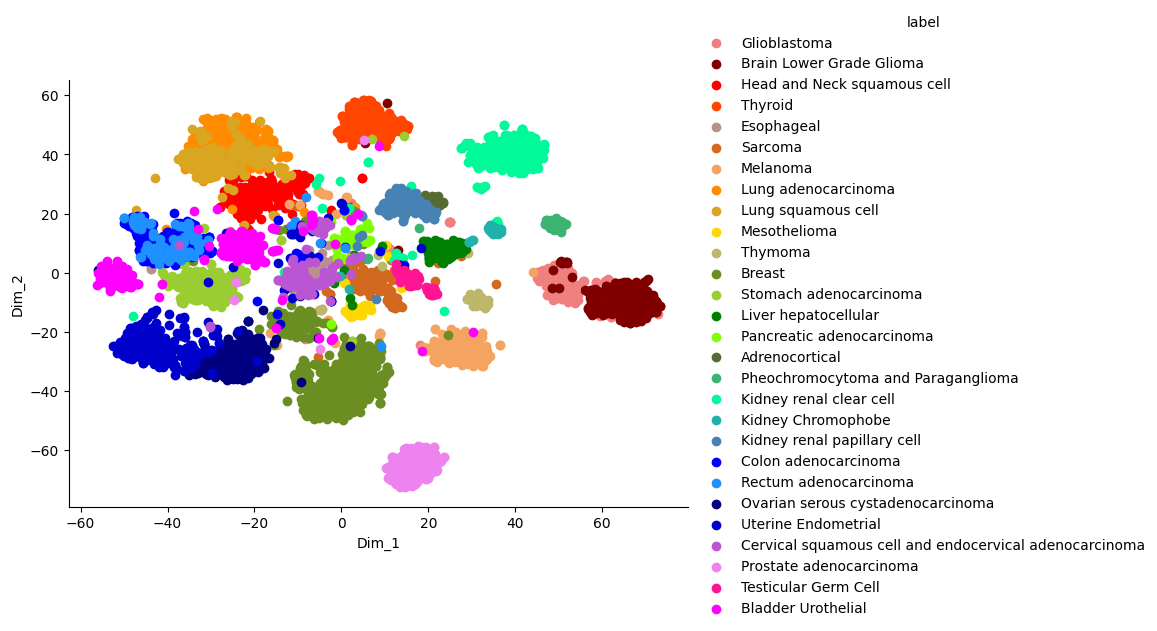

In [24]:
# TSNE on standarised data

model = TSNE(n_components=2, random_state=1)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue_kws={'color': ['lightcoral', 
                                         'maroon', 
                                         'red', 
                                         'orangered', 
                                         'rosybrown', 
                                         'chocolate', 
                                         'sandybrown', 
                                         'darkorange', 
                                         'goldenrod', 
                                         'gold', 
                                         'darkkhaki', 
                                         'olivedrab', 
                                         'yellowgreen', 
                                         'green', 
                                         'chartreuse', 
                                         'darkolivegreen',
                                         'mediumseagreen',
                                         'mediumspringgreen',
                                         'lightseagreen',
                                         'steelblue', 
                                         'blue',
                                         'dodgerblue',
                                         'navy',
                                         'mediumblue',
                                         'mediumorchid',
                                         'violet',
                                         'deeppink',
                                         'magenta']}, hue="label", aspect= 1.5, height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

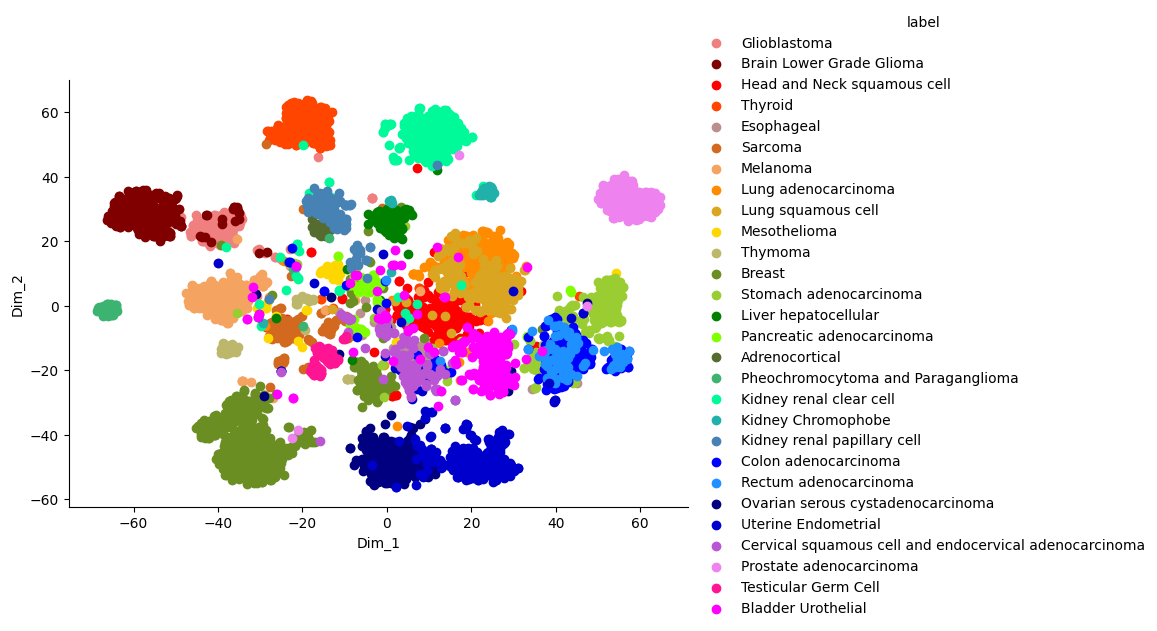

In [25]:
# TSNE on non-standised data

model = TSNE(n_components=2, random_state=1)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue_kws={'color': ['lightcoral', 
                                         'maroon', 
                                         'red', 
                                         'orangered', 
                                         'rosybrown', 
                                         'chocolate', 
                                         'sandybrown', 
                                         'darkorange', 
                                         'goldenrod', 
                                         'gold', 
                                         'darkkhaki', 
                                         'olivedrab', 
                                         'yellowgreen', 
                                         'green', 
                                         'chartreuse', 
                                         'darkolivegreen',
                                         'mediumseagreen',
                                         'mediumspringgreen',
                                         'lightseagreen',
                                         'steelblue', 
                                         'blue',
                                         'dodgerblue',
                                         'navy',
                                         'mediumblue',
                                         'mediumorchid',
                                         'violet',
                                         'deeppink',
                                         'magenta']}, hue="label", aspect= 1.5, height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**Conclusion:** T-SNE is not able to seperate the cancer types whether the protein expression data is standardised or not

## Uniform Manifold Approximation and Projection (UMAP)

In [26]:
# 2D UMAP on standarised data

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(standardized_data)

# Define specific colors for each label
color_map = {
    'Glioblastoma': 'lightcoral',
    'Brain Lower Grade Glioma': 'maroon',
    'Head and Neck squamous cell': 'red',
    'Thyroid': 'orangered',
    'Esophageal': 'rosybrown',
    'Sarcoma': 'chocolate',
    'Melanoma': 'sandybrown',
    'Lung adenocarcinoma': 'darkorange',
    'Lung squamous cell': 'goldenrod',
    'Mesothelioma': 'gold',
    'Thymoma': 'darkkhaki',
    'Breast': 'olivedrab',
    'Stomach adenocarcinoma': 'yellowgreen',
    'Liver hepatocellular': 'green',
    'Pancreatic adenocarcinoma': 'chartreuse',
    'Adrenocortical': 'darkolivegreen',
    'Pheochromocytoma and Paraganglioma': 'mediumseagreen',
    'Kidney renal clear cell': 'mediumspringgreen',
    'Kidney Chromophobe': 'lightseagreen',
    'Kidney renal papillary cell': 'steelblue',
    'Colon adenocarcinoma': 'blue',
    'Rectum adenocarcinoma': 'dodgerblue',
    'Ovarian serous cystadenocarcinoma': 'navy',
    'Uterine Endometrial': 'mediumblue',
    'Cervical squamous cell and endocervical adenocarcinoma': 'mediumorchid',
    'Prostate adenocarcinoma': 'violet',
    'Testicular Germ Cell': 'deeppink',
    'Bladder Urothelial': 'magenta'
}

# Plot the UMAP embedding
fig_2d = px.scatter(proj_2d, x=0, y=1, color=labels, color_discrete_map=color_map, labels=labels)
fig_2d.show()

C:\Users\Eloisa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [27]:
# 3D UMAP on standardised data

umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_3d = umap_3d.fit_transform(standardized_data)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=labels, labels=labels,
    color_discrete_sequence= [           'lightcoral', 
                                         'maroon', 
                                         'red', 
                                         'orangered', 
                                         'rosybrown', 
                                         'chocolate', 
                                         'sandybrown', 
                                         'darkorange', 
                                         'goldenrod', 
                                         'gold', 
                                         'darkkhaki', 
                                         'olivedrab', 
                                         'yellowgreen', 
                                         'green', 
                                         'chartreuse', 
                                         'darkolivegreen',
                                         'mediumseagreen',
                                         'mediumspringgreen',
                                         'lightseagreen',
                                         'steelblue', 
                                         'blue',
                                         'dodgerblue',
                                         'navy',
                                         'mediumblue',
                                         'mediumorchid',
                                         'violet',
                                         'deeppink',
                                         'magenta']
)

fig_3d.show()


C:\Users\Eloisa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [28]:
# 2D UMAP on non-standarised data

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(data)

# Define specific colors for each label
color_map = {
    'Glioblastoma': 'lightcoral',
    'Brain Lower Grade Glioma': 'maroon',
    'Head and Neck squamous cell': 'red',
    'Thyroid': 'orangered',
    'Esophageal': 'rosybrown',
    'Sarcoma': 'chocolate',
    'Melanoma': 'sandybrown',
    'Lung adenocarcinoma': 'darkorange',
    'Lung squamous cell': 'goldenrod',
    'Mesothelioma': 'gold',
    'Thymoma': 'darkkhaki',
    'Breast': 'olivedrab',
    'Stomach adenocarcinoma': 'yellowgreen',
    'Liver hepatocellular': 'green',
    'Pancreatic adenocarcinoma': 'chartreuse',
    'Adrenocortical': 'darkolivegreen',
    'Pheochromocytoma and Paraganglioma': 'mediumseagreen',
    'Kidney renal clear cell': 'mediumspringgreen',
    'Kidney Chromophobe': 'lightseagreen',
    'Kidney renal papillary cell': 'steelblue',
    'Colon adenocarcinoma': 'blue',
    'Rectum adenocarcinoma': 'dodgerblue',
    'Ovarian serous cystadenocarcinoma': 'navy',
    'Uterine Endometrial': 'mediumblue',
    'Cervical squamous cell and endocervical adenocarcinoma': 'mediumorchid',
    'Prostate adenocarcinoma': 'violet',
    'Testicular Germ Cell': 'deeppink',
    'Bladder Urothelial': 'magenta'
}

# Plot the UMAP embedding
fig_2d = px.scatter(proj_2d, x=0, y=1, color=labels, color_discrete_map=color_map, labels=labels)
fig_2d.show()

C:\Users\Eloisa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [29]:
# 3D UMAP on non-standardised data

umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_3d = umap_3d.fit_transform(data)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=labels, labels=labels,
    color_discrete_sequence= [           'lightcoral', 
                                         'maroon', 
                                         'red', 
                                         'orangered', 
                                         'rosybrown', 
                                         'chocolate', 
                                         'sandybrown', 
                                         'darkorange', 
                                         'goldenrod', 
                                         'gold', 
                                         'darkkhaki', 
                                         'olivedrab', 
                                         'yellowgreen', 
                                         'green', 
                                         'chartreuse', 
                                         'darkolivegreen',
                                         'mediumseagreen',
                                         'mediumspringgreen',
                                         'lightseagreen',
                                         'steelblue', 
                                         'blue',
                                         'dodgerblue',
                                         'navy',
                                         'mediumblue',
                                         'mediumorchid',
                                         'violet',
                                         'deeppink',
                                         'magenta']
)

fig_3d.show()

C:\Users\Eloisa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Since 2D UMAP on standardised data performed the best, I will compare the clustering when only the cancer types included in the reference paper are used to test if the addition of the other cancer types affects clustering ability.

In [30]:
ref_cancer_types = ['Glioblastoma', 
                    'Head and Neck squamous cell', 
                    'Lung adenocarcinoma', 
                    'Lung squamous cell',
                    'Breast',
                    'Kidney renal clear cell',
                    'Colon adenocarcinoma',
                    'Rectum adenocarcinoma',
                    'Ovarian serous cystadenocarcinoma',
                    'Uterine Endometrial',
                    'Bladder Urothelial']

ref_cancer_data = ML_TCGA_Data[ML_TCGA_Data['projectid'].isin(ref_cancer_types)]


In [31]:
# Seperating the labels (cancer types) and the data (proteins)
labels_ref = ref_cancer_data["projectid"]
data_ref = ref_cancer_data.drop(["projectid"], axis=1)

# Data-preprocessing: Standardising the data
from sklearn.preprocessing import StandardScaler
standardized_data_ref = StandardScaler().fit_transform(data_ref)

In [32]:
# 2D UMAP on standarised data

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(standardized_data_ref)

# Define specific colors for each label
color_map = {
    'Glioblastoma': 'lightcoral',
    'Head and Neck squamous cell': 'red',
    'Lung adenocarcinoma': 'darkorange',
    'Lung squamous cell': 'goldenrod',
    'Breast': 'olivedrab',
    'Kidney renal clear cell': 'mediumspringgreen',
    'Colon adenocarcinoma': 'blue',
    'Rectum adenocarcinoma': 'dodgerblue',
    'Ovarian serous cystadenocarcinoma': 'navy',
    'Uterine Endometrial': 'mediumblue',
    'Bladder Urothelial': 'magenta'
}

# Plot the UMAP embedding
fig_2d = px.scatter(proj_2d, x=0, y=1, color=labels_ref, color_discrete_map=color_map, labels=labels_ref)
fig_2d.show()

C:\Users\Eloisa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



**Conclusion:** 2D UMAP on standarised protein data is the best at visualising the clusters, so this will be used as reference to compare to the outputs of the machine learning models. Also, the addition of the other cancer types that weren't in the paper did not significantly change the positions of the cancer clusters in relation to each other. 